In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("vehicle.csv")

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.shape

(846, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
df_copy=df.copy()
df_copy.shape

(846, 19)

In [8]:
# We can see that there are 'NaN' values in few columns.
df_copy.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
# attribute that contains Zero values.
print((df_copy == 0).sum())

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    0
pr.axis_aspect_ratio            0
max.length_aspect_ratio         0
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 0
scaled_variance.1               0
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1     0
skewness_about                 77
skewness_about.1               30
skewness_about.2                0
hollows_ratio                   0
class                           0
dtype: int64


In [10]:
"""
<b>Now skewness_about,skewness_about.1 contains 77 and 30 Zero(0) values respectively.Earlier though was to replace zeros but
i think these are not errors.so will keep them as it.<b>
""" 


'\n<b>Now skewness_about,skewness_about.1 contains 77 and 30 Zero(0) values respectively.Earlier though was to replace zeros but\ni think these are not errors.so will keep them as it.<b>\n'

In [11]:
print((df_copy==0).sum())

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    0
pr.axis_aspect_ratio            0
max.length_aspect_ratio         0
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 0
scaled_variance.1               0
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1     0
skewness_about                 77
skewness_about.1               30
skewness_about.2                0
hollows_ratio                   0
class                           0
dtype: int64


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [13]:
# Now we will check total NaN values in all columns
df_copy.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
"""
We can see we have columns with 'NaN' values.We will replace them with mean/median accordingly.
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
""" 
"""
I can't plot distplot as columns contains NaN values.So i will remove NaN and 
then check the data is normally distributed or not
"""

# df_copy_circularity=df_copy['circularity'].dropna(axis=0)
# df_copy_distance_circularity= df_copy['distance_circularity'].dropna(axis=0)
# df_copy_radius_ratio= df_copy['radius_ratio'].dropna(axis=0)
# df_copy_praxis_aspect_ratio= df_copy['pr.axis_aspect_ratio'].dropna(axis=0)
# df_copy_scatter_ratio= df_copy['scatter_ratio'].dropna(axis=0)
# df_copy_elongatedness= df_copy['elongatedness'].dropna(axis=0)
# df_copy_praxis_rectangularity= df_copy['pr.axis_rectangularity'].dropna(axis=0)
# df_copy_scaled_variance= df_copy['scaled_variance'].dropna(axis=0)
# df_copy_scaled_variance1= df_copy['scaled_variance.1'].dropna(axis=0)
# df_copy_scaled_radius_of_gyration= df_copy['scaled_radius_of_gyration'].dropna(axis=0)
# df_copy_scaled_radius_of_gyration1= df_copy['scaled_radius_of_gyration.1'].dropna(axis=0)
# df_copy_skewness_about= df_copy['skewness_about'].dropna(axis=0)
# df_copy_skewness_about1= df_copy['skewness_about.1'].dropna(axis=0)
# df_copy_skewness_about2= df_copy['skewness_about.2'].dropna(axis=0)


# sns.distplot(df_copy_circularity)

# skewness_about=df_copy['skewness_about'].dropna()
# skewness_about.count()




"\nI can't plot distplot as columns contains NaN values.So i will remove NaN and \nthen check the data is normally distributed or not\n"

In [15]:
# Class is categorical.will convert it to interger and then replace NaN.

df_copy['class']=df_copy['class'].astype('category').cat.codes
df_copy['class'].head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int8

In [16]:
# Missing value changed by using Impurter or by using fillNa method.
# imputer=Imputer(missing_values='NaN',strategy='median',axis=0)

# transformed_X=imputer.fit_transform(df_copy)

# transformed_X.dtype
df_copy.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [17]:
# Missing value changed by using Impurter or by using fillNa method.
# df_copy_With_No_NA=df_copy.fillna(df_copy.median,inplace=True)
# df_copy_With_No_NA
df_copy_With_No_NAN_Values=df_copy.fillna(df_copy.median())
df_copy_With_No_NAN_Values.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

<b>Missing values are handeled by replacing with Median  in  the datasets.<b>

# Finding Outliers and Removing them

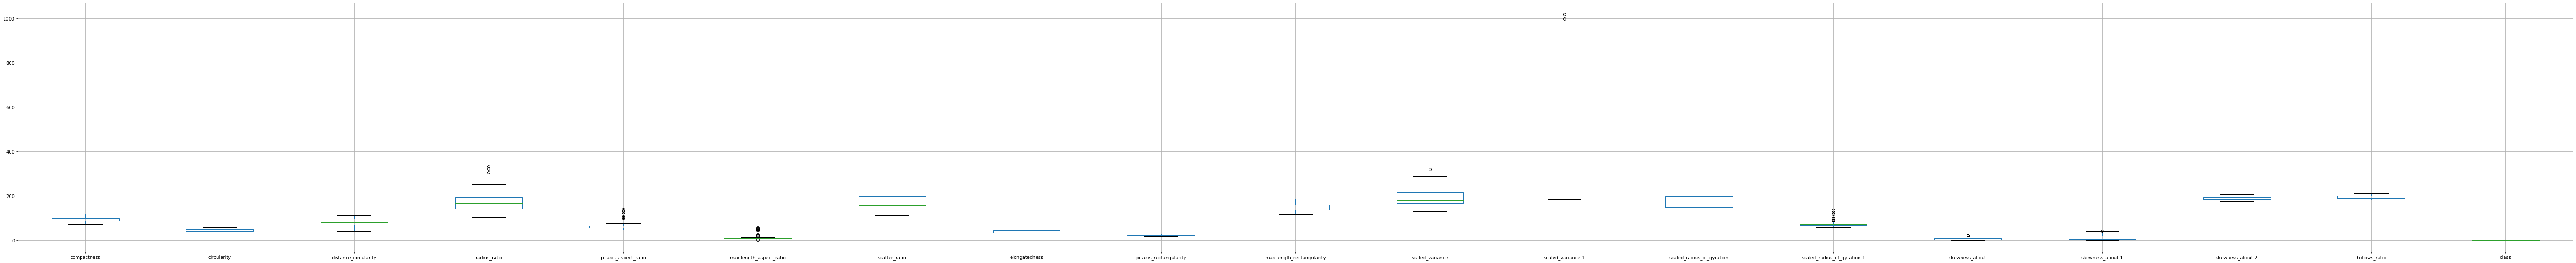

In [18]:
df_copy_With_No_NAN_Values.boxplot(figsize=(100,10))

In [19]:
"""
We have outliers in radius_ratio,pr.axis_aspect_ratio,
max.length_aspect_ratio,scaled_variance,scaled_radius_of_gyration.1,skewness_about,skewness_about1
""" 

'\nWe have outliers in radius_ratio,pr.axis_aspect_ratio,\nmax.length_aspect_ratio,scaled_variance,scaled_radius_of_gyration.1,skewness_about,skewness_about1\n'

In [20]:
Q1 = df_copy_With_No_NAN_Values.quantile(0.25)
Q3 =  df_copy_With_No_NAN_Values.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [21]:
df_copy_With_No_NAN_Values = df_copy_With_No_NAN_Values[~((df_copy_With_No_NAN_Values < (Q1 - 1.5 * IQR)) |(df_copy_With_No_NAN_Values > (Q3 + 1.5 * IQR))).any(axis=1)]
df_copy_With_No_NAN_Values.shape

(813, 19)

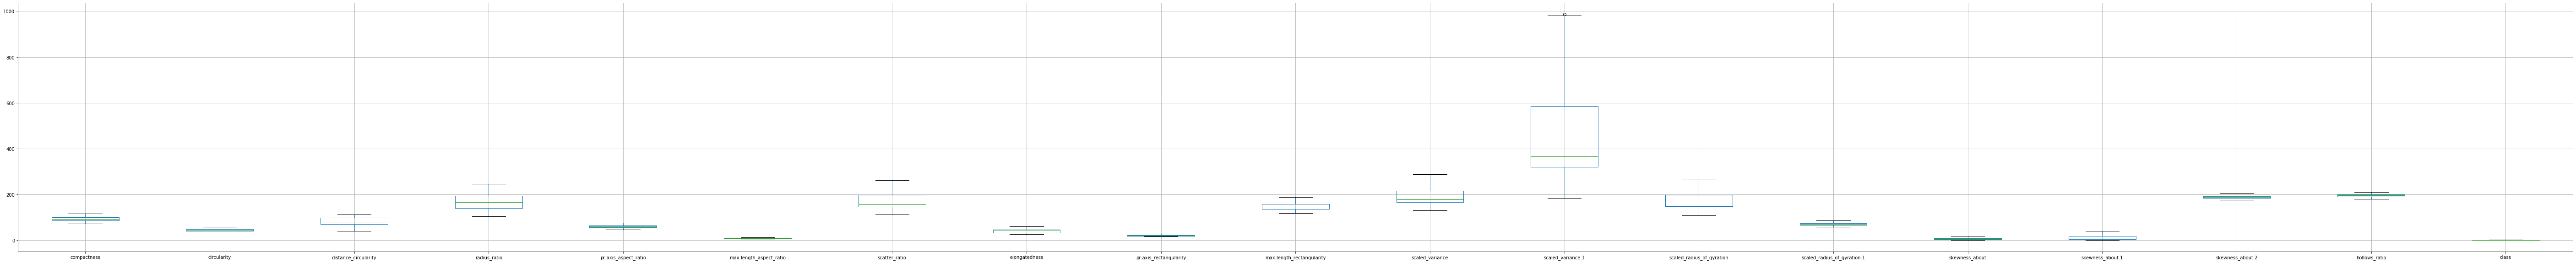

In [22]:
"""
We can see in boxplot,outliers are removed
"""
df_copy_With_No_NAN_Values.boxplot(figsize=(100,10))

# Now we will find correlation to find relation between Independent Var

In [23]:
df_copy_With_No_NAN_Values_Corr=df_copy_With_No_NAN_Values.corr(method='pearson')
df_copy_With_No_NAN_Values_Corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.679327              0.786824   
circularity                     0.679327     1.000000              0.786778   
distance_circularity            0.786824     0.786778              1.000000   
radius_ratio                    0.745988     0.640936              0.808331   
pr.axis_aspect_ratio            0.200634     0.206156              0.245454   
max.length_aspect_ratio         0.497660     0.564159              0.668833   
scatter_ratio                   0.810842     0.843765              0.905577   
elongatedness                  -0.788560    -0.815764             -0.908687   
pr.axis_rectangularity          0.811866     0.840162              0.894783   
max.length_rectangularity       0.674166     0.961220              0.768689   
scaled_variance                 0.791464     0.802762              0.884133   
scaled_variance.1               0.812494     0.832483              0.888193   
scaled_radius_of_gyration       0.577688     0.925142              0.702483   
scaled_radius_of_gyration.1    -0.253678     0.066697             -0.237938   
skewness_about                  0.200640     0.140391              0.098813   
skewness_about.1                0.161106    -0.014342              0.263508   
skewness_about.2                0.295414    -0.116832              0.128912   
hollows_ratio                   0.364160     0.039182              0.321655   
class                          -0.028066    -0.150490             -0.058524   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.745988              0.200634   
circularity                      0.640936              0.206156   
distance_circularity             0.808331              0.245454   
radius_ratio                     1.000000              0.666209   
pr.axis_aspect_ratio             0.666209              1.000000   
max.length_aspect_ratio          0.460691              0.138261   
scatter_ratio                    0.789523              0.199971   
elongatedness                   -0.844025             -0.301918   
pr.axis_rectangularity           0.763829              0.169752   
max.length_rectangularity        0.576791              0.145857   
scaled_variance                  0.792802              0.214810   
scaled_variance.1                0.776142              0.186297   
scaled_radius_of_gyration        0.550545              0.153509   
scaled_radius_of_gyration.1     -0.403176             -0.325102   
skewness_about                   0.040306             -0.051539   
skewness_about.1                 0.187190             -0.028583   
skewness_about.2                 0.418354              0.406292   
hollows_ratio                    0.504693              0.419801   
class                           -0.225750             -0.216582   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.497660       0.810842   
circularity                                 0.564159       0.843765   
distance_circularity                        0.668833       0.905577   
radius_ratio                                0.460691       0.789523   
pr.axis_aspect_ratio                        0.138261       0.199971   
max.length_aspect_ratio                     1.000000       0.497466   
scatter_ratio                               0.497466       1.000000   
elongatedness                              -0.502377      -0.972340   
pr.axis_rectangularity                      0.497233       0.989441   
max.length_rectangularity                   0.647844       0.807070   
scaled_variance                             0.411562       0.977548   
scaled_variance.1                           0.457892       0.992982   
scaled_radius_of_gyration                   0.404288       0.794915   
scaled_radius_of_gyration.1                -0.332752       0.002444   
skewness_about                            

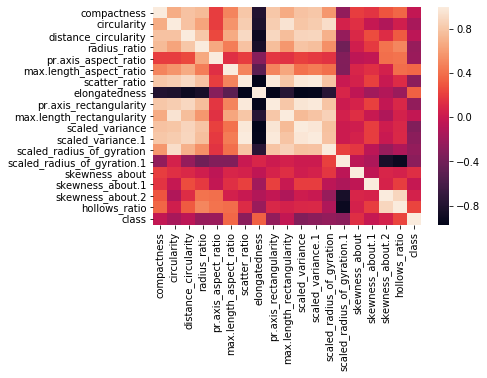

In [24]:
# plot the heatmap
sns.heatmap(df_copy_With_No_NAN_Values_Corr, 
        xticklabels=df_copy_With_No_NAN_Values_Corr.columns,
        yticklabels=df_copy_With_No_NAN_Values_Corr.columns)


In [25]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df_copy_With_No_NAN_Values_Corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

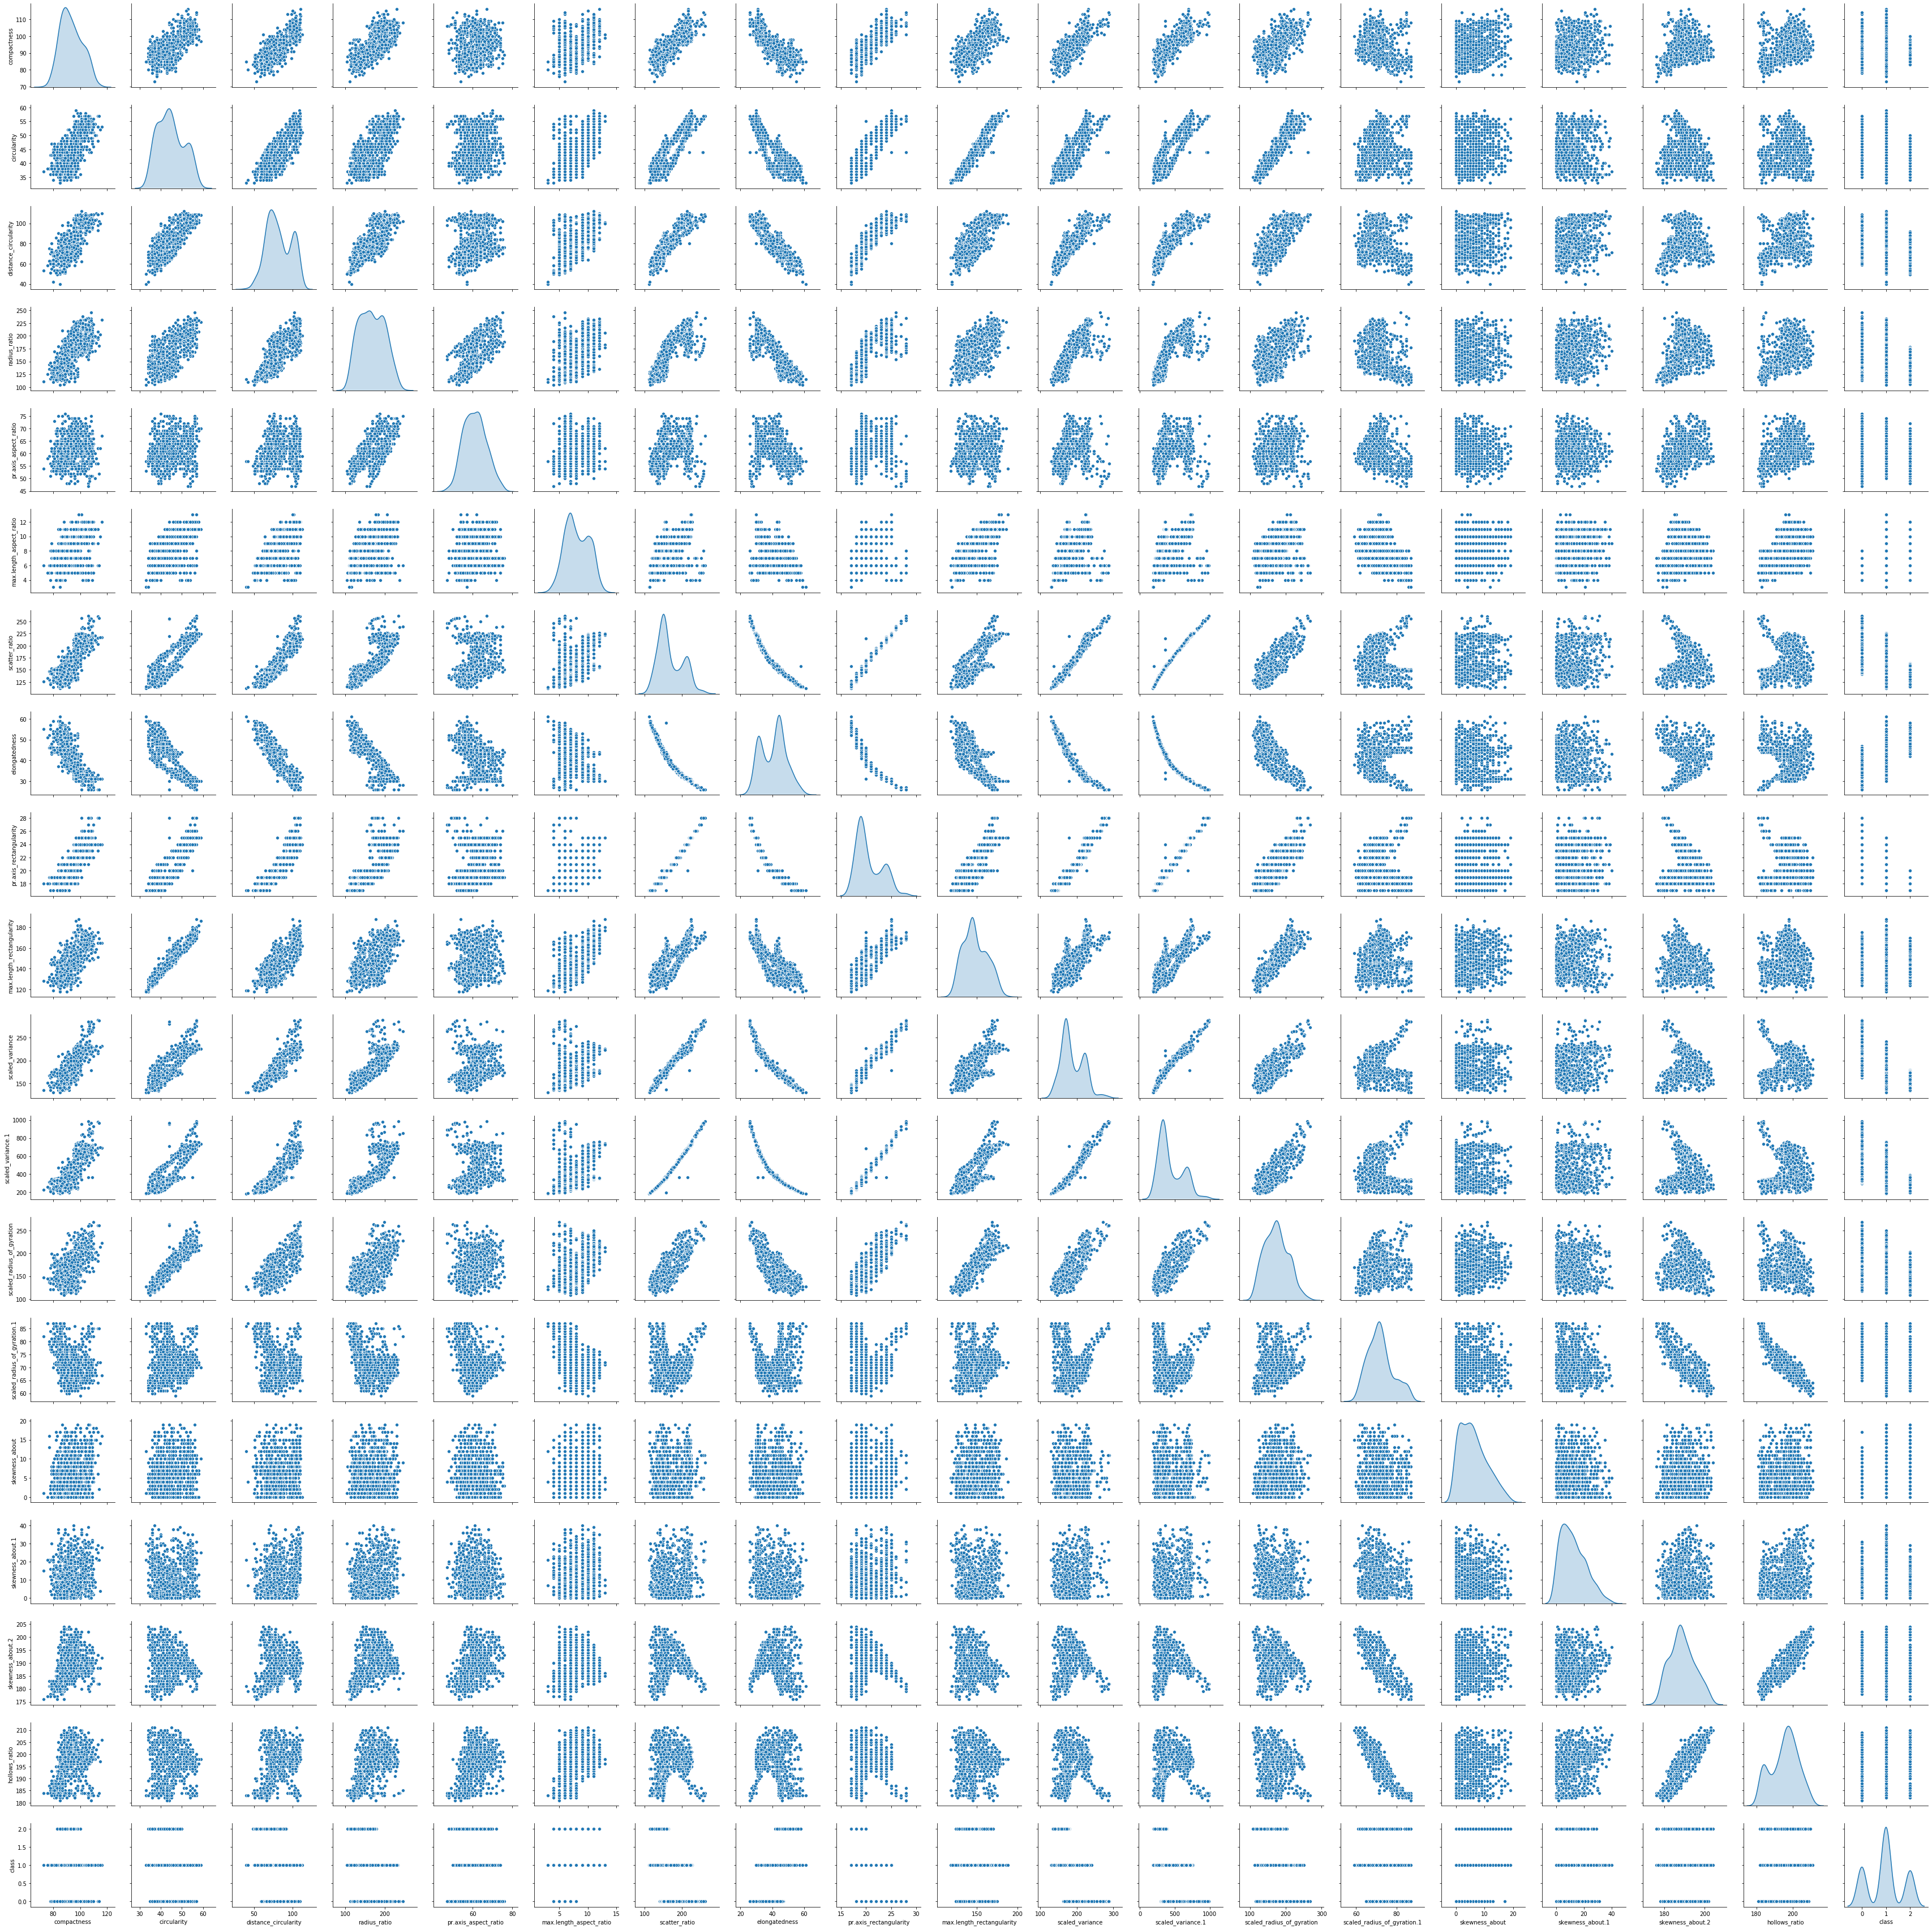

In [26]:
# Find inferences
"""
Compactness shows high significance with circularity,distance_circularity,radius_ratio,
scatter_ratio,elongatedness in a negative way,pr.axis_rectangularity,max.length_rectangularity,
scaled_variance,scaled_variance.1



""" 
#Let us check for pair plots
sns.pairplot(df_copy_With_No_NAN_Values,diag_kind='kde')

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

# Create a covariance matrix for identifying Principal components

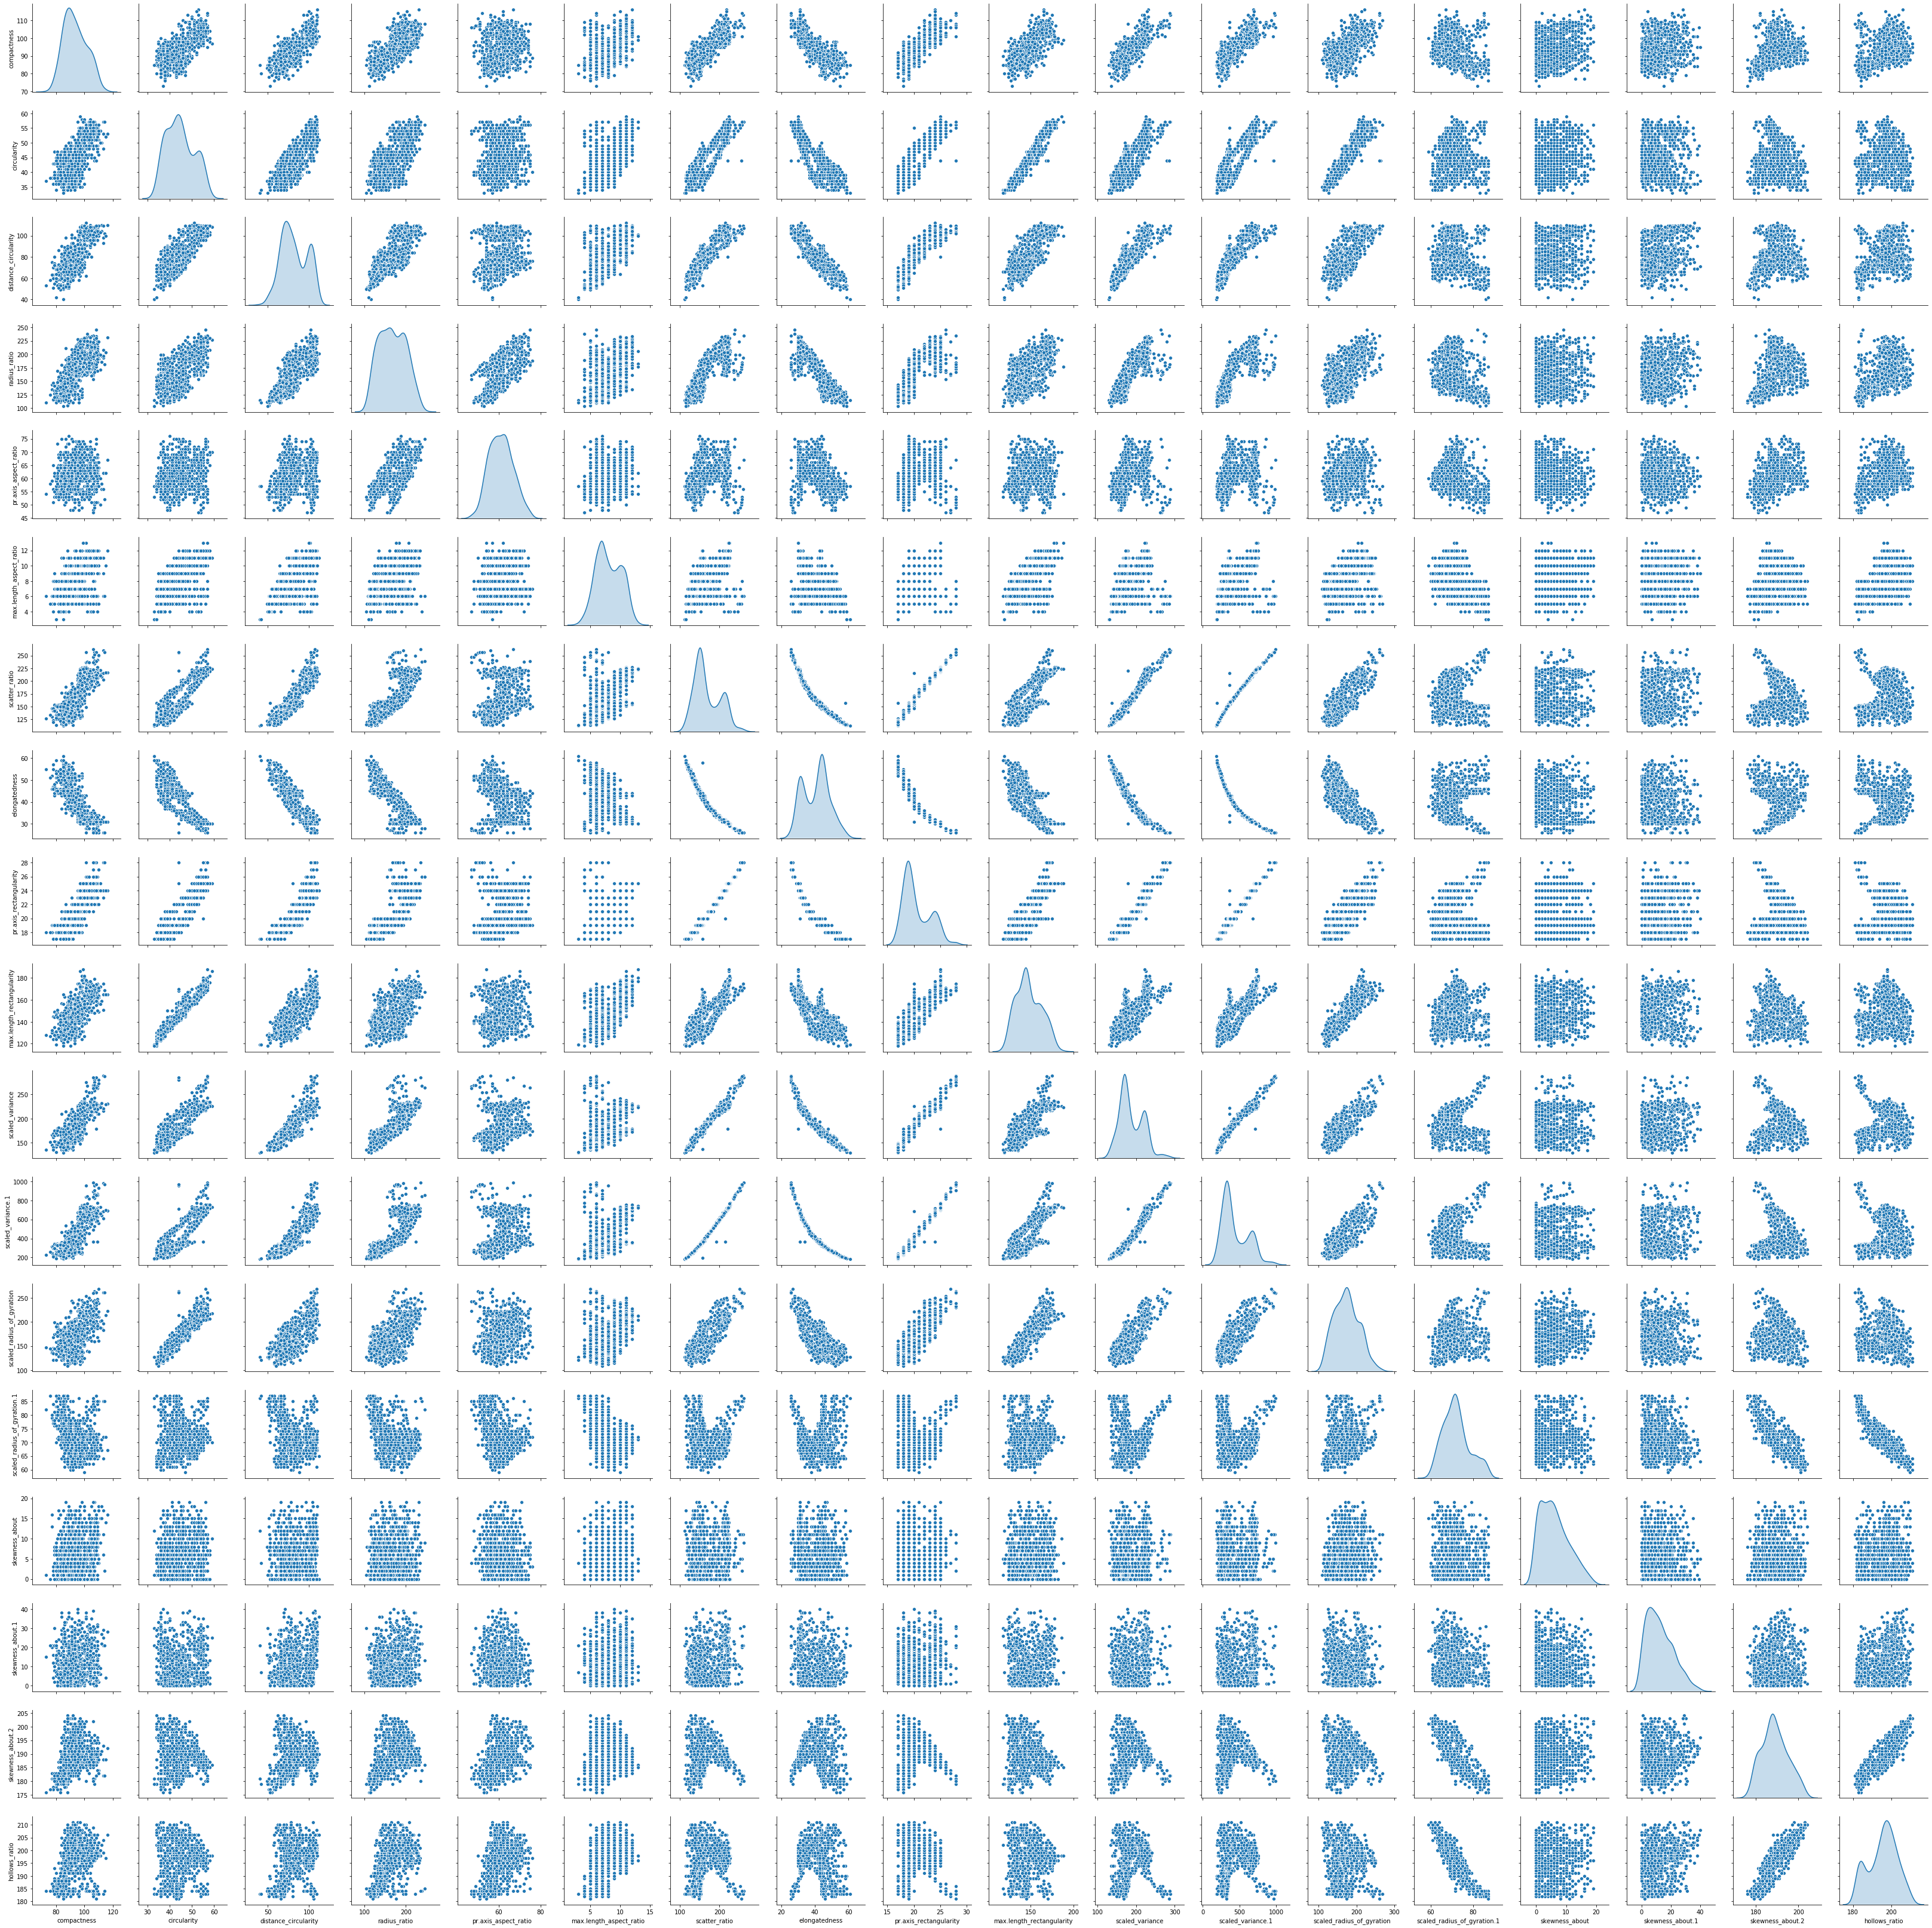

In [26]:
# In this class is a dependent variable.So removing it for PCA.
X=df_copy_With_No_NAN_Values.drop(['class'],axis=1)
X.head()
y=df_copy_With_No_NAN_Values[['class']]
sns.pairplot(X,diag_kind='kde')

In [27]:
"""
We will scale the data with the help of zscore.It is used to remove the influence of one attribute over others in terms of 
units.
""" 
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.172252     0.524273              0.054413      0.320514   
1    -0.324348    -0.621958              0.118805     -0.852833   
2     1.289602     0.851768              1.535438      1.303589   
3    -0.076048    -0.621958             -0.009980     -0.282015   
5     1.662052    -0.130716              1.535438      0.130242   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.923745                 0.917511      -0.210249   
1             -0.743688                 0.429013      -0.607056   
2              0.856772                 0.917511       1.163315   
3              0.323285                 0.429013      -0.759675   
5             -1.988490                -1.036481       2.628450   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.143541               -0.226542                   0.763046   
1       0.532106               -0.618411                  -0.342266   
2      -1.151676                0.949066                   0.693964   
3       0.661628               -0.618411                  -0.342266   
5      -1.928806                2.908414                   1.453866   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.393996          -0.345187                   0.297468   
1        -0.592152          -0.626997                  -0.505992   
2         1.158224           1.127127                   1.409952   
3        -0.922412          -0.747772                  -1.463965   
5         3.040704           2.979021                   2.769655   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.323897       -0.038246          0.379490   
1                    -0.000795        0.609548          0.155190   
2                     0.160756        1.689205         -0.405562   
3                    -1.454753       -0.038246         -0.293412   
5                     2.099367       -0.254177         -0.405562   

   skewness_about.2  hollows_ratio  
0         -0.324770       0.176759  
1          0.002617       0.449185  
2         -0.161076       0.040546  
3          1.639554       1.538891  
5         -1.306932      -1.730226

In [28]:

#  Create covariance matrix

cov_matrix = np.cov(XScaled,rowvar=False)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123153e+00
   6.67029240e-

# Identify eigen values and eigen vector

In [29]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -

# Find variance and cumulative variance by each eigen vector

In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.33850121  73.07712653  79.78403645  86.09068965  91.0639364
  94.71662207  96.50917296  97.76821471  98.39378701  98.81663795
  99.1597671   99.40525421  99.571671    99.72022979  99.82817322
  99.9264921   99.9826541  100.        ]


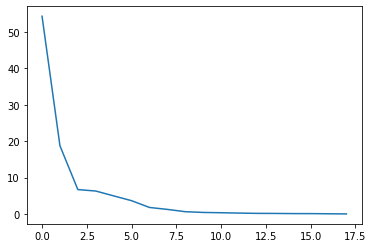

In [31]:
plt.plot(var_exp)

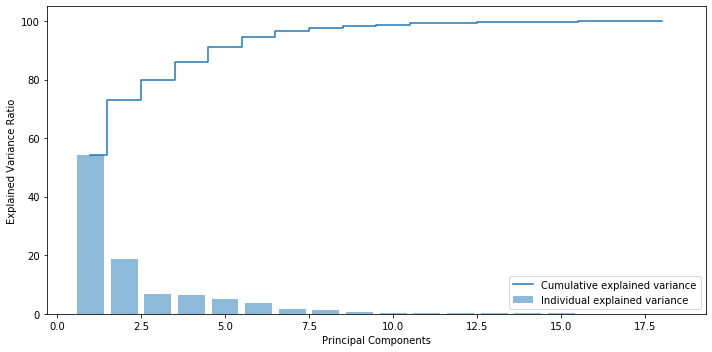

In [32]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [33]:
"""
Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
We will proceed with 7 components here.
""" 

"\nVisually we can observe that their is steep drop in variance explained with increase in number of PC's.\nWe will proceed with 7 components here.\n"

# Using PCA command from sklearn and find Principal Components. Transform data to components formed

In [34]:
# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)
from sklearn.decomposition import PCA
pca7 = PCA(n_components=7)
pca7.fit(XScaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7=pca7.transform(XScaled)
    

[[ 0.27225105  0.28537005  0.30148623  0.27259451  0.09857976  0.19475579
   0.31051844 -0.30843834  0.30754849  0.27630107  0.30274811  0.30704063
   0.26152049 -0.04363236  0.0367057   0.05885041  0.03483739  0.08281362]
 [-0.08972848  0.13317394 -0.04402596 -0.20423223 -0.25913686 -0.09457563
   0.07233508 -0.01168768  0.08409153  0.12583663  0.07019986  0.07793366
   0.20992728  0.50391445 -0.01456825 -0.09339805 -0.50166421 -0.50654656]
 [-0.02260451 -0.21080994  0.07087808  0.04021396 -0.11480523 -0.13931348
   0.1129247  -0.09003305  0.11106355 -0.21987769  0.14481876  0.11532395
  -0.21362744  0.06739209 -0.52162344  0.68717064 -0.06220695 -0.04080354]
 [-0.13041903  0.02067855 -0.10742522  0.25295734  0.605228   -0.32253141
   0.01005404 -0.07991176 -0.01604649 -0.06665079  0.06980451  0.01736316
   0.07224572  0.13586056 -0.49012168 -0.38023248  0.03553916 -0.10300842]
 [ 0.15232414 -0.13902259 -0.08073354  0.11901255  0.08321282 -0.62137607
   0.08124056 -0.07473792  0.07750

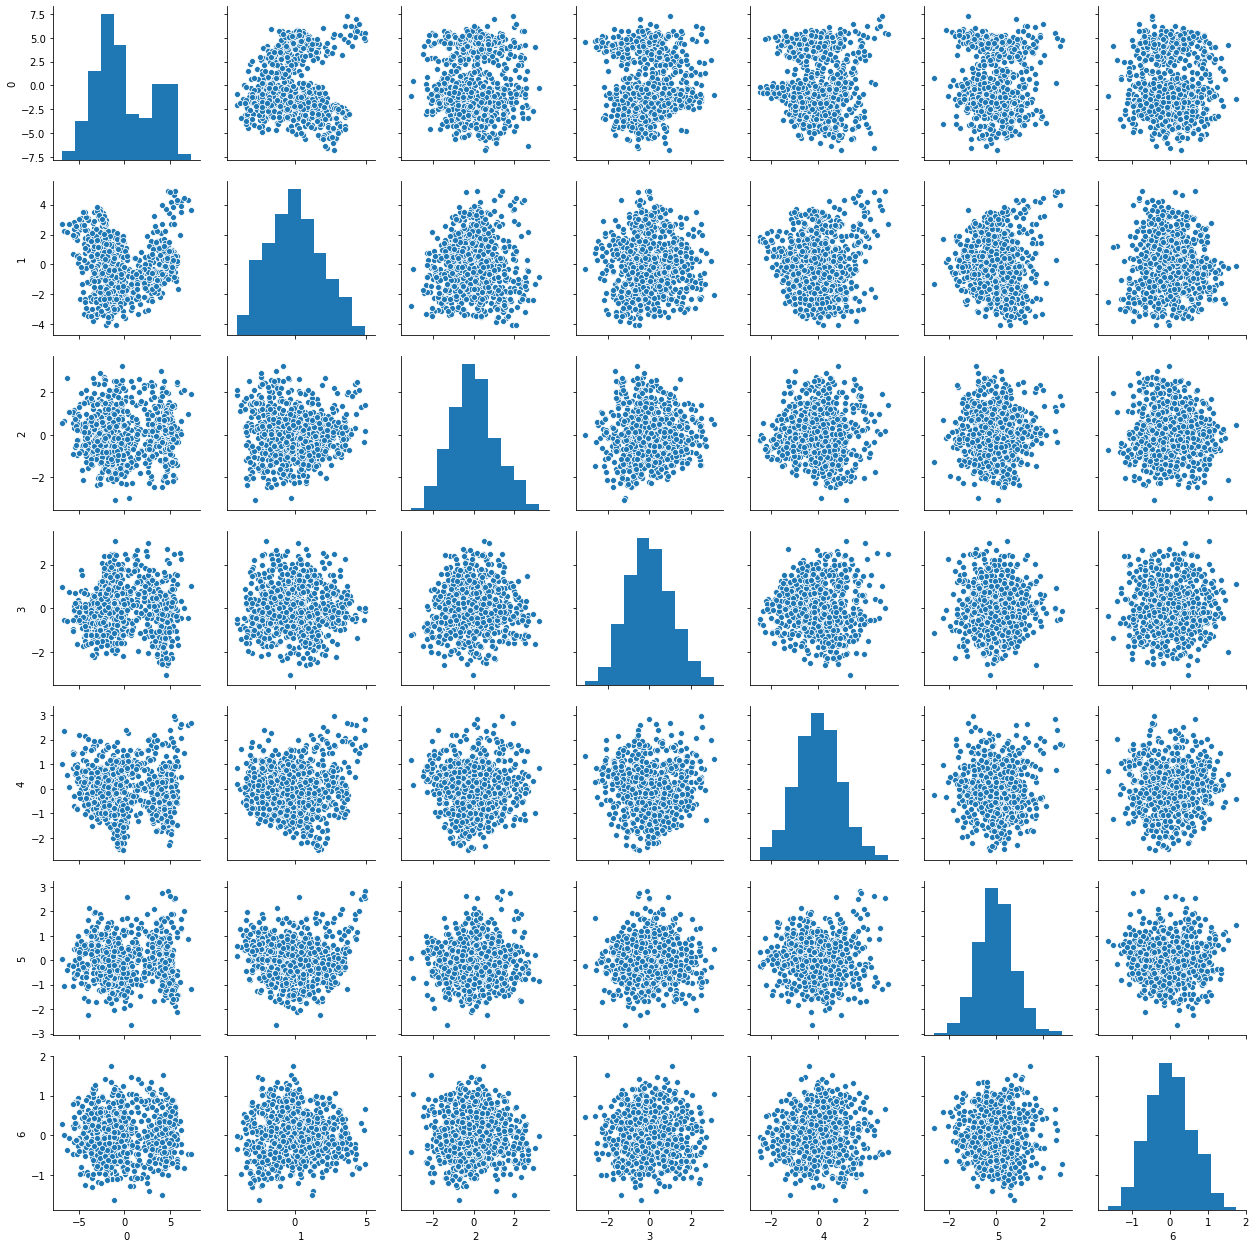

In [40]:
"""
We can see these are independent and not corelated.So we have reduced dimensions
and covered almost 95 % of variation or information as rest are noise.
""" 
sns.pairplot(pd.DataFrame(Xpca7))

# SVM


In [35]:
from sklearn import svm

In [36]:
XScaled.shape

(813, 18)

In [37]:
y.head()

class
0      2
1      2
2      1
3      2
5      0

In [38]:
# Split the Data.Considering all variables.
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=.30, random_state=1)

In [39]:
# Gamma is a measure of influence of a data point.C is complexity of the model,lower C value creates simple  hypersurface.
clf=svm.SVC(gamma=0.025,C=3)
clf

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
clf.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_predSVM=clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predSVM)*100
print(('Accuracy of SVM model with all variables is equal '+ str(round(accuracy, 2))) + ' %.')

Accuracy of SVM model with all variables is equal 97.54 %.


In [43]:
# MAking confusion matrix
from sklearn.metrics import confusion_matrix
cmSVMAllVar=confusion_matrix(y_test,y_predSVM)
cmSVMAllVar

array([[ 78,   0,   0],
       [  1, 119,   1],
       [  1,   3,  41]], dtype=int64)

# SVM With PCA(7 Var)

In [44]:
Xpca7.shape

(813, 7)

In [45]:
# Split the data
X_train7Var,X_test7Var,y_train7Var,y_test7Var=train_test_split(Xpca7,y,test_size=.30,random_state=1)

In [46]:
clf7Var=svm.SVC(gamma=0.25,C=3)
clf7Var

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
clf7Var.fit(X_train7Var,y_train7Var)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
y_PredSVM7Var=clf7Var.predict(X_test7Var)
y_PredSVM7Var

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 1], dtype=int8)

In [49]:
from sklearn.metrics import accuracy_score
accuracy7Var=accuracy_score(y_test7Var,y_PredSVM7Var)*100
print(('Accuracy of SVM model with 7 variables is equal '+ str(round(accuracy7Var, 2))) + ' %.')

Accuracy of SVM model with 7 variables is equal 94.67 %.


In [50]:
# MAking confusion matrix
from sklearn.metrics import confusion_matrix
cmSVM7Var=confusion_matrix(y_test7Var,y_PredSVM7Var)
cmSVM7Var

array([[ 74,   2,   2],
       [  1, 117,   3],
       [  0,   5,  40]], dtype=int64)

# Accuracy Comparison of SVM With or Without PCA

In [51]:
print(('Accuracy of SVM model with all variables is equal '+ str(round(accuracy, 2))) + ' %.')
print(('Accuracy of SVM model with 7 variables is equal '+ str(round(accuracy7Var, 2))) + ' %.')

Accuracy of SVM model with all variables is equal 97.54 %.
Accuracy of SVM model with 7 variables is equal 94.67 %.


# Naive Bayes

In [52]:

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()


In [57]:
# With all variables
classifier.fit(X_train,y_train)

y_predNaiveAllVar=classifier.predict(X_test)
y_predNaiveAllVar

cmNaiveAllVar=confusion_matrix(y_test,y_predNaiveAllVar)
cmNaiveAllVar

accuracyNaiveBayesAllVar=accuracy_score(y_test,y_predNaiveAllVar)*100
print('Accuracy of Naive Bayes for all Variables is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of Naive Bayes for all Variables is equal 97.54 %.


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# With 7 variables
classifier.fit(X_train7Var,y_train7Var)

y_predNaive7Var=classifier.predict(X_test7Var)
y_predNaive7Var

cmNaive7Var=confusion_matrix(y_test7Var,y_predNaive7Var)
cmNaive7Var

accuracyNaiveBayes7Var=accuracy_score(y_test7Var,y_predNaive7Var)*100
print('Accuracy of Naive Bayes for 7 Variables is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Naive Bayes for 7 Variables is equal 97.54 %.


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Accuracy of Naive Bayes With or Without PCA

In [59]:
print('Accuracy of Naive Bayes for 7 Variables is equal ' + str(round(accuracy, 2)) + ' %.')
print('Accuracy of Naive Bayes for all Variables is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of Naive Bayes for 7 Variables is equal 97.54 %.
Accuracy of Naive Bayes for all Variables is equal 97.54 %.


In [60]:
    # Hyper Parameter

In [61]:
from sklearn.metrics import classification_report

In [63]:
from sklearn.svm import SVC


In [64]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       0.98      0.98      0.98       121
           2       0.98      0.91      0.94        45

    accuracy                           0.98       244
   macro avg       0.98      0.96      0.97       244
weighted avg       0.98      0.98      0.98       244



In [65]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda\lib

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.518, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.822, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.810, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.518, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.696, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.746, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war


[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.942, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.518, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.518, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] 

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.984, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.932, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.968, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.984, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.901, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.921, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.910, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.979, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.952, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.979, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.927, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.968, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [66]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [67]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       0.98      0.98      0.98       121
           2       0.98      0.93      0.95        45

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.97       244
weighted avg       0.98      0.98      0.98       244

